In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
schools = pd.read_csv('Schools_clear.csv', index_col=0)

In [3]:
schools.head(n = 2)

,SED Code,District,Latitude,Longitude,Zip,Economic Need Index,School Income Estimate,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,...,Percent White_80%,Percent White_81%,Percent White_82%,Percent White_83%,Percent White_85%,Percent White_87%,Percent White_88%,Percent White_9%,Percent White_91%,Percent White_92%
0,310100010015,1,40.721834,-73.978766,10009,0.919,31141.72,0.94,0.18,0.89,...,0,0,0,0,0,0,0,0,0,0
1,310100010019,1,40.729892,-73.984231,10003,0.641,56462.88,0.92,0.30,0.96,...,0,0,0,0,0,0,0,0,0,0


In [4]:
names = schools['School Name']
names
prom = dict()

for item in names:
    if item in prom:
        prom[item] += 1
    else:
        prom[item] = 1
prom

KeyError: 'School Name'

Каждое наблюдение – это отдельная школа.

In [60]:
schools_dum = pd.get_dummies(schools)

In [61]:
schools_dum.head(2)

,SED Code,District,Latitude,Longitude,Zip,Economic Need Index,School Income Estimate,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,...,Percent White_80%,Percent White_81%,Percent White_82%,Percent White_83%,Percent White_85%,Percent White_87%,Percent White_88%,Percent White_9%,Percent White_91%,Percent White_92%
0,310100010015,1,40.721834,-73.978766,10009,0.919,31141.72,0.94,0.18,0.89,...,0,0,0,0,0,0,0,0,0,0
1,310100010019,1,40.729892,-73.984231,10003,0.641,56462.88,0.92,0.30,0.96,...,0,0,0,0,0,0,0,0,0,0


In [62]:
len(list(schools_dum.columns))

4314

In [63]:
schools_dum.to_csv("Schools_clear.csv")

----------------------

Продолжим работать с очищенным файлом.

In [5]:
schools = schools_dum

NameError: name 'schools_dum' is not defined

In [6]:
schools = pd.read_csv('Schools_clear.csv', index_col=0)

In [7]:
schools.head(2)

,SED Code,District,Latitude,Longitude,Zip,Economic Need Index,School Income Estimate,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,...,Percent White_80%,Percent White_81%,Percent White_82%,Percent White_83%,Percent White_85%,Percent White_87%,Percent White_88%,Percent White_9%,Percent White_91%,Percent White_92%
0,310100010015,1,40.721834,-73.978766,10009,0.919,31141.72,0.94,0.18,0.89,...,0,0,0,0,0,0,0,0,0,0
1,310100010019,1,40.729892,-73.984231,10003,0.641,56462.88,0.92,0.30,0.96,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

In [21]:
X_sne = tsne.fit_transform(schools)

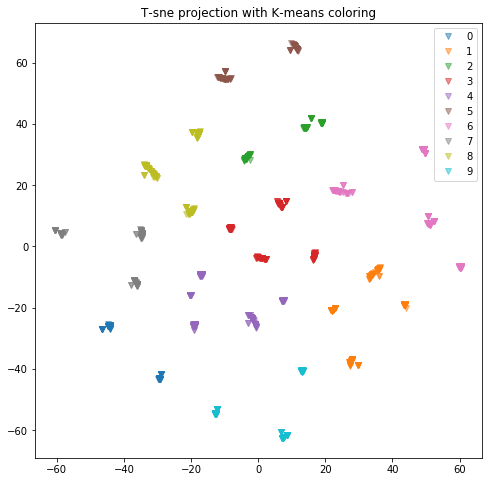

In [13]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 10, random_state=123)
km.fit(X_sne)
y = km.predict(X_sne)

plt.figure(figsize=(8, 8))

for i in range(10):
    bit_mask = y == i
    plt.plot(X_sne[bit_mask, 0], X_sne[bit_mask, 1], 'v',label=i,
               alpha=0.5)

plt.legend()
plt.title('T-sne projection with K-means coloring')
plt.show()

Попробуем сделать больше кластеров.

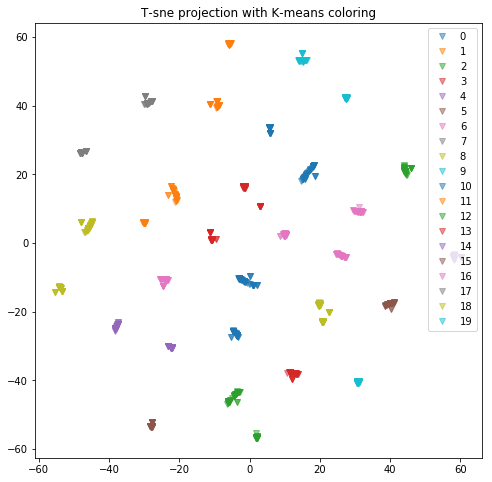

In [25]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 20, random_state=123)
km.fit(X_sne)
y = km.predict(X_sne)

plt.figure(figsize=(8, 8))

for i in range(20):
    bit_mask = y == i
    plt.plot(X_sne[bit_mask, 0], X_sne[bit_mask, 1], 'v',label=i,
               alpha=0.5)

plt.legend()
plt.title('T-sne projection with K-means coloring')
plt.show()

А теперь – меньше.

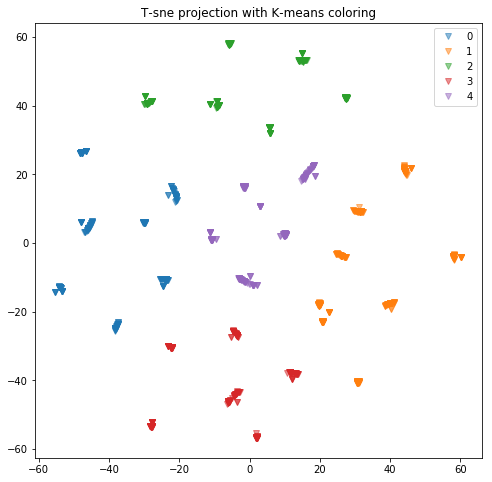

In [26]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 5, random_state=123)
km.fit(X_sne)
y = km.predict(X_sne)

plt.figure(figsize=(8, 8))

for i in range(5):
    bit_mask = y == i
    plt.plot(X_sne[bit_mask, 0], X_sne[bit_mask, 1], 'v',label=i,
               alpha=0.5)

plt.legend()
plt.title('T-sne projection with K-means coloring')
plt.show()

Если просто посчитать эти группы объектов, получится ~33. Попробуем разбить на 30 кластеров.

In [44]:
sns.set(palette='dark')

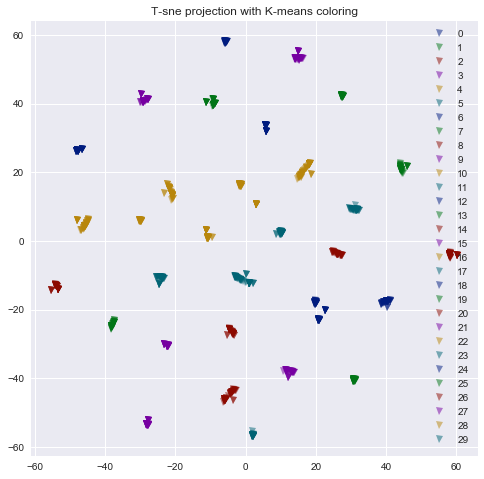

In [45]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 30, random_state=123)
km.fit(X_sne)
y = km.predict(X_sne)

plt.figure(figsize=(8, 8))

for i in range(30):
    bit_mask = y == i
    plt.plot(X_sne[bit_mask, 0], X_sne[bit_mask, 1], 'v',label=i,
               alpha=0.5)

plt.legend()
plt.title('T-sne projection with K-means coloring')
plt.show()

Это нужно добить разными цветами!

Если 30 кластеров, посмотрим, что, например, относится к 0 кластеру.

In [50]:
zero_cluster = schools.iloc[y==0, :]

In [53]:
zero_cluster

,SED Code,District,Latitude,Longitude,Zip,Economic Need Index,School Income Estimate,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,...,Percent White_80%,Percent White_81%,Percent White_82%,Percent White_83%,Percent White_85%,Percent White_87%,Percent White_88%,Percent White_9%,Percent White_91%,Percent White_92%
592,331800010066,18,40.648646,-73.906851,11236,0.526000,56939.680000,0.950000,0.12000,0.810000,...,0,0,0,0,0,0,0,0,0,0
593,331800010068,18,40.635220,-73.910912,11236,0.590000,48443.128493,0.920000,0.25000,0.810000,...,0,0,0,0,0,0,0,0,0,0
594,331800010114,18,40.642544,-73.908030,11236,0.702000,57130.200000,0.920000,0.28000,0.930000,...,0,0,0,0,0,0,0,0,0,0
595,331800010115,18,40.634851,-73.897895,11236,0.550000,59768.440000,0.940000,0.18000,0.930000,...,0,0,0,0,0,0,0,0,0,0
596,331800010135,18,40.653258,-73.932975,11203,0.680000,41884.400000,0.950000,0.18000,0.820000,...,0,0,0,0,0,0,0,0,0,0
597,331800010208,18,40.642701,-73.930900,11203,0.557000,57979.650000,0.940000,0.21000,0.940000,...,0,0,0,0,0,0,0,0,0,0
598,331800010211,18,40.643163,-73.895658,11236,0.601000,48443.128493,0.930000,0.21000,0.870000,...,0,0,0,0,0,0,0,0,0,0
599,331800010219,18,40.658996,-73.922485,11212,0.771000,38077.710000,0.910000,0.35000,0.860000,...,0,0,0,0,0,0,0,0,0,0
600,331800010233,18,40.651408,-73.914021,11236,0.631000,48175.620000,0.930000,0.25000,0.890000,...,0,0,0,0,0,0,0,0,0,0
601,331800010235,18,40.654737,-73.940641,11203,0.520000,48361.640000,0.950000,0.11000,0.920000,...,0,0,0,0,0,0,0,0,0,0


Попробуем построить это.

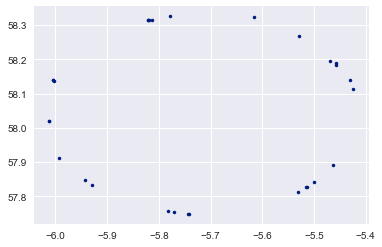

In [55]:
plt.plot(X_sne[y==0, 0], X_sne[y==0, 1], marker = '.', linestyle='none')

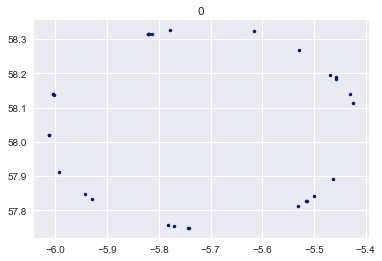

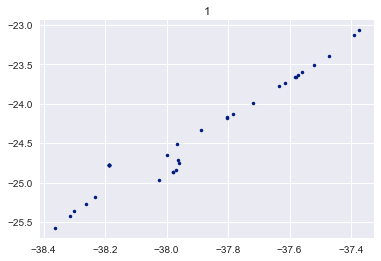

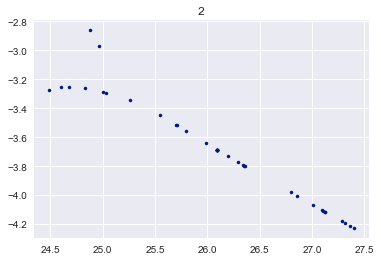

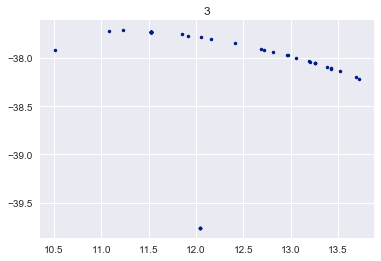

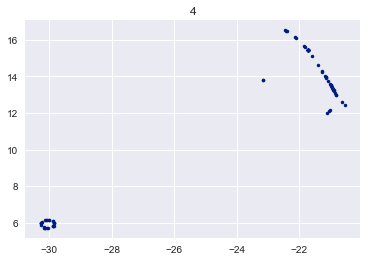

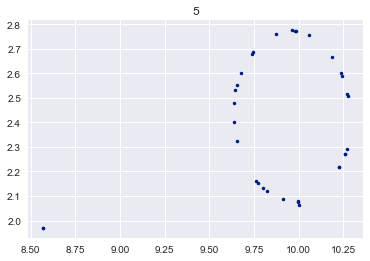

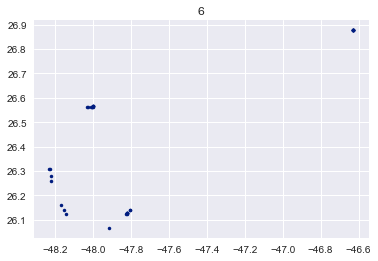

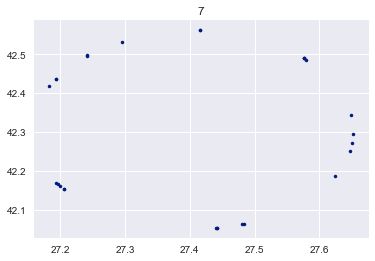

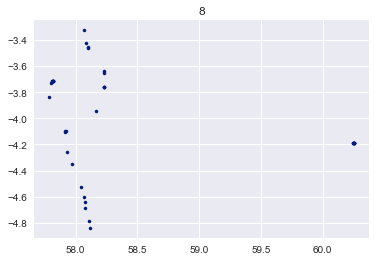

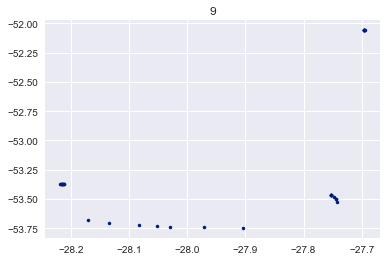

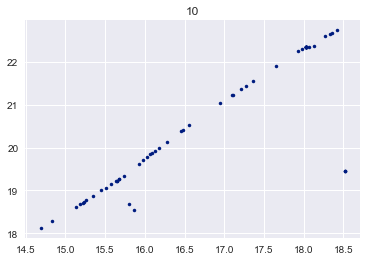

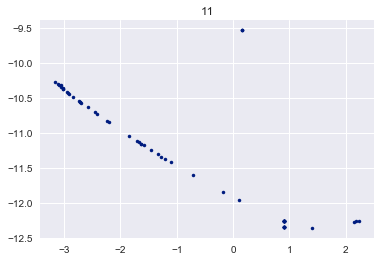

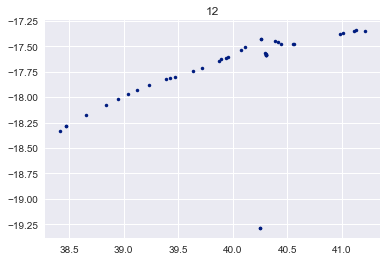

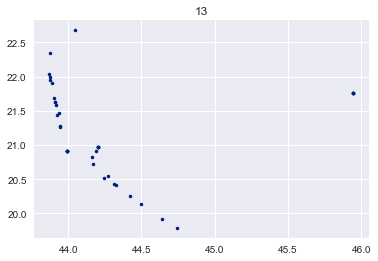

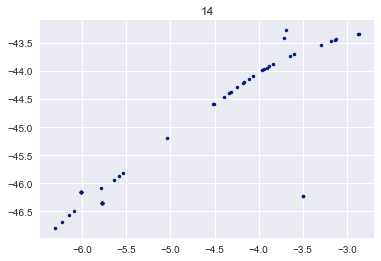

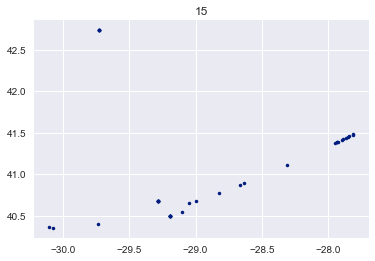

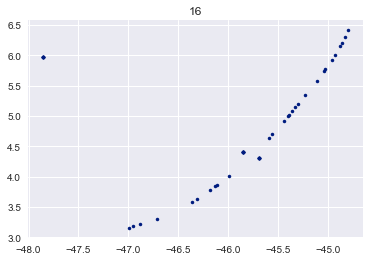

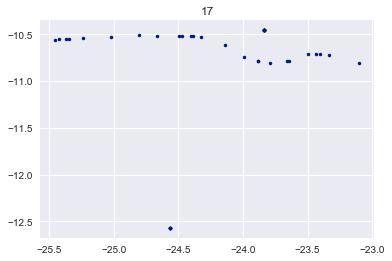

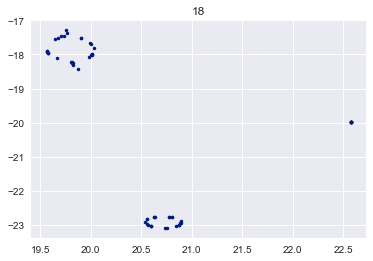

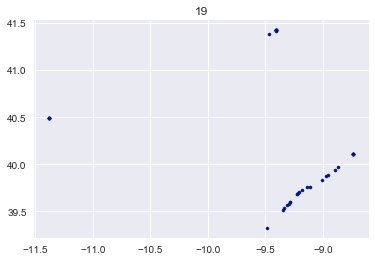

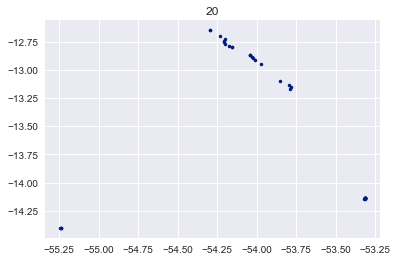

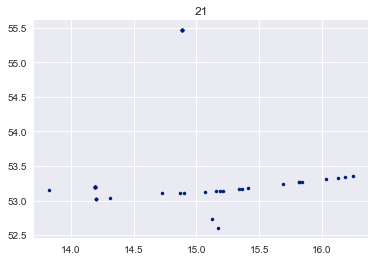

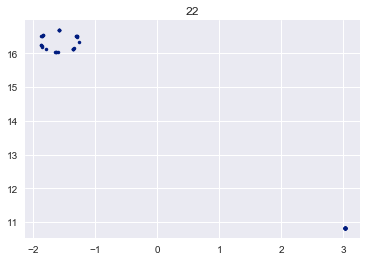

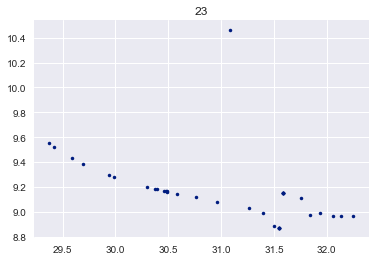

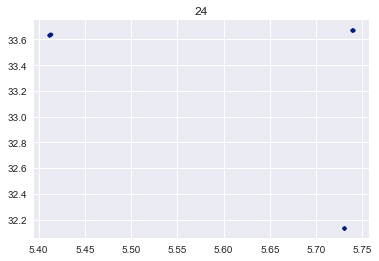

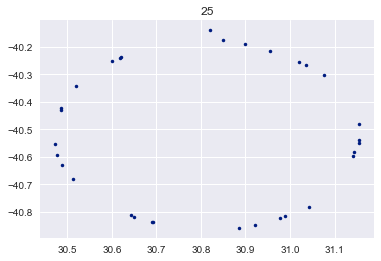

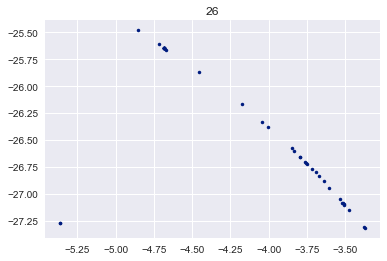

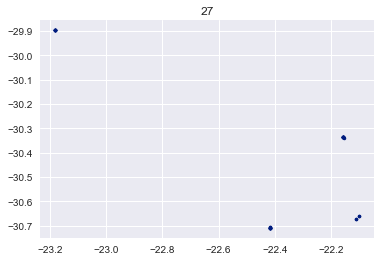

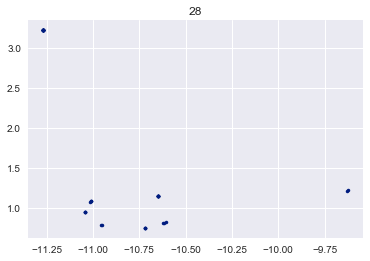

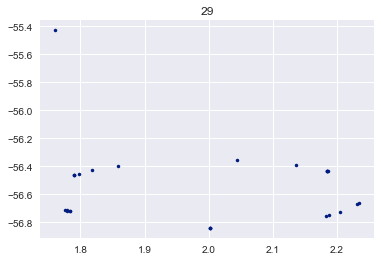

In [79]:
for i in range(30):
    _ = plt.plot(X_sne[y==i, 0], X_sne[y==i, 1], marker = '.', linestyle='none')
    plt.title(i)
    plt.show()

In [58]:
?subplots

Object `subplots` not found.
